# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных
В качестве набора данных я буду использовать набор данных для прогнозирования цен на автомобили - 
https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset/data

Датасет состоит из одного файла:

cardekho.csv

Этот набор данных содержит различные характеристики, связанные с автомобилями, включая год выпуска, цену продажи, пробег, тип топлива, тип продавца, тип трансмиссии, количество предыдущих владельцев, пробег и характеристики двигателя. Эти атрибуты дают ценную информацию о факторах, влияющих на цены на автомобили, и могут использоваться для разработки прогнозных моделей для оценки продажной цены автомобилей.
Файл содержит следующие колонки:
- name - наименование;
- year - год выпуска;
- selling_price - цена продажи;
- km_driven - пробег;
- fuel - тип топлива;
- seller_type - тип продавца;
- transmission - тип трансмиссии;
- owner - количество предыдущих владельцев;
- mileage(km/ltr/kg) - пробег;
- engine - мощность;
- max_power - максимальная скорость;
- seats - количество сидячих мест.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv('D:/TMO 2024/cardekho.csv', sep=",")

## 2) Основные характеристики датасета

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
data.shape

(8128, 12)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 8128


In [19]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brand'],
      dtype='object')

In [18]:
data.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
dtype: object

In [8]:
cat_temp_data = data[['max_power']]
cat_temp_data.head()

,max_power
0,74
1,103.52
2,78
3,90
4,88.2


In [9]:
cat_temp_data['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [10]:
cat_temp_data[cat_temp_data['max_power'].isnull()].shape

(215, 1)

In [12]:
def convert_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
brand_le = le.fit_transform(data['brand'])

In [22]:
data['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [23]:
arr_brand_enc = np.unique(brand_le)
arr_brand_enc

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [15]:
data["max_power"] = data["max_power"].apply(convert_float)
data['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

In [14]:
missing = ["mileage(km/ltr/kg)", "engine", "max_power", "seats"]
for i in missing:
    data[i].fillna(data[i].median(), inplace=True)

In [19]:
data["brand"] = data["name"].apply(lambda x: x.split()[0])

In [20]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

name - 0
year - 0
selling_price - 0
km_driven - 0
fuel - 0
seller_type - 0
transmission - 0
owner - 0
mileage(km/ltr/kg) - 0
engine - 0
max_power - 0
seats - 0
brand - 0


In [17]:
data.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.415554,1452.89813,91.264982,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.981922,498.19672,35.376388,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.00000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.00000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.00000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.00000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.00000,400.000000,14.000000


## 3) Визуальное исследование датасета

### Категории и их количество в наборе данных

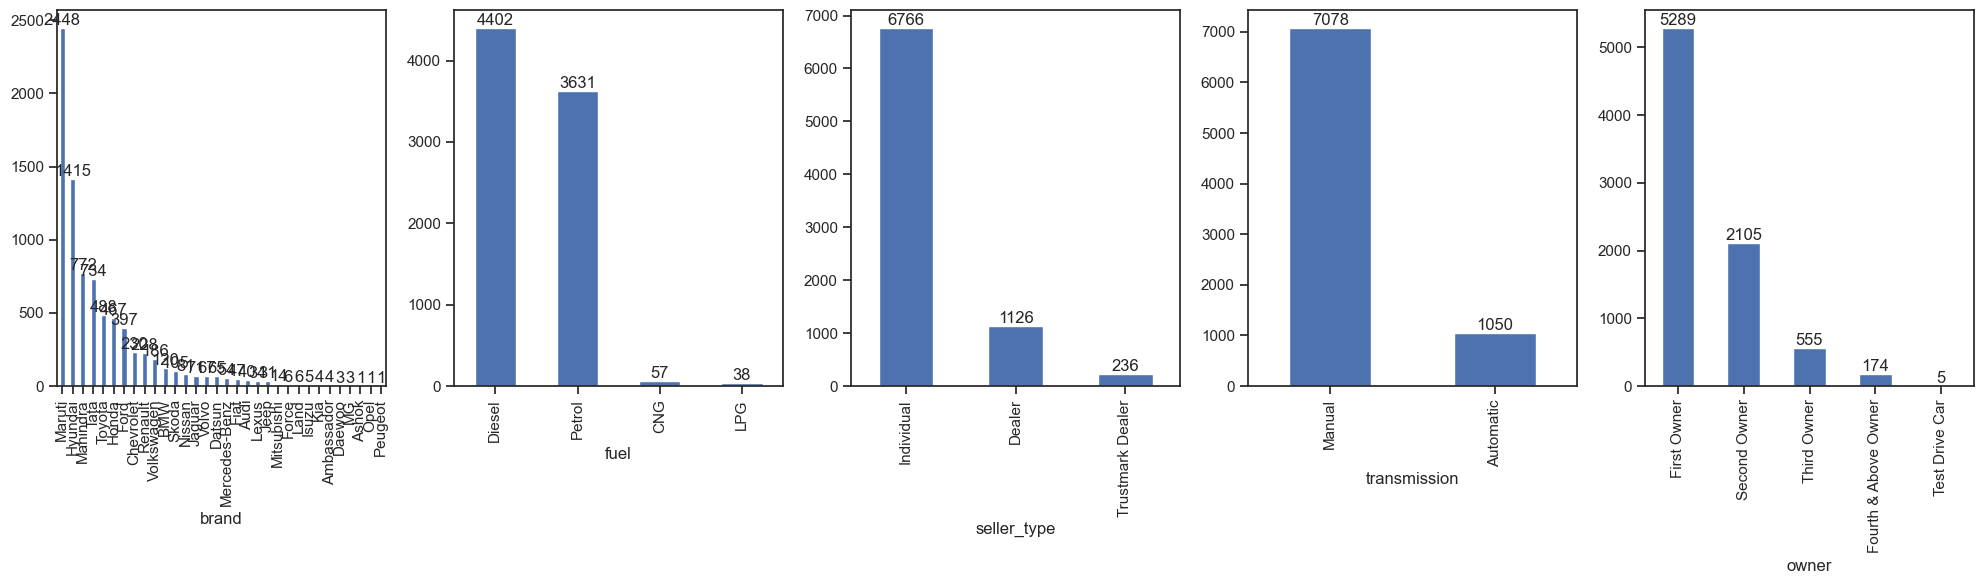

In [20]:
categoricals = ["brand", "fuel", "seller_type", "transmission", "owner"]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
for i, j in enumerate(categoricals):
    data[j].value_counts().plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
plt.tight_layout()
plt.show()

### Распределение числовых данных, показывающее различную статистику

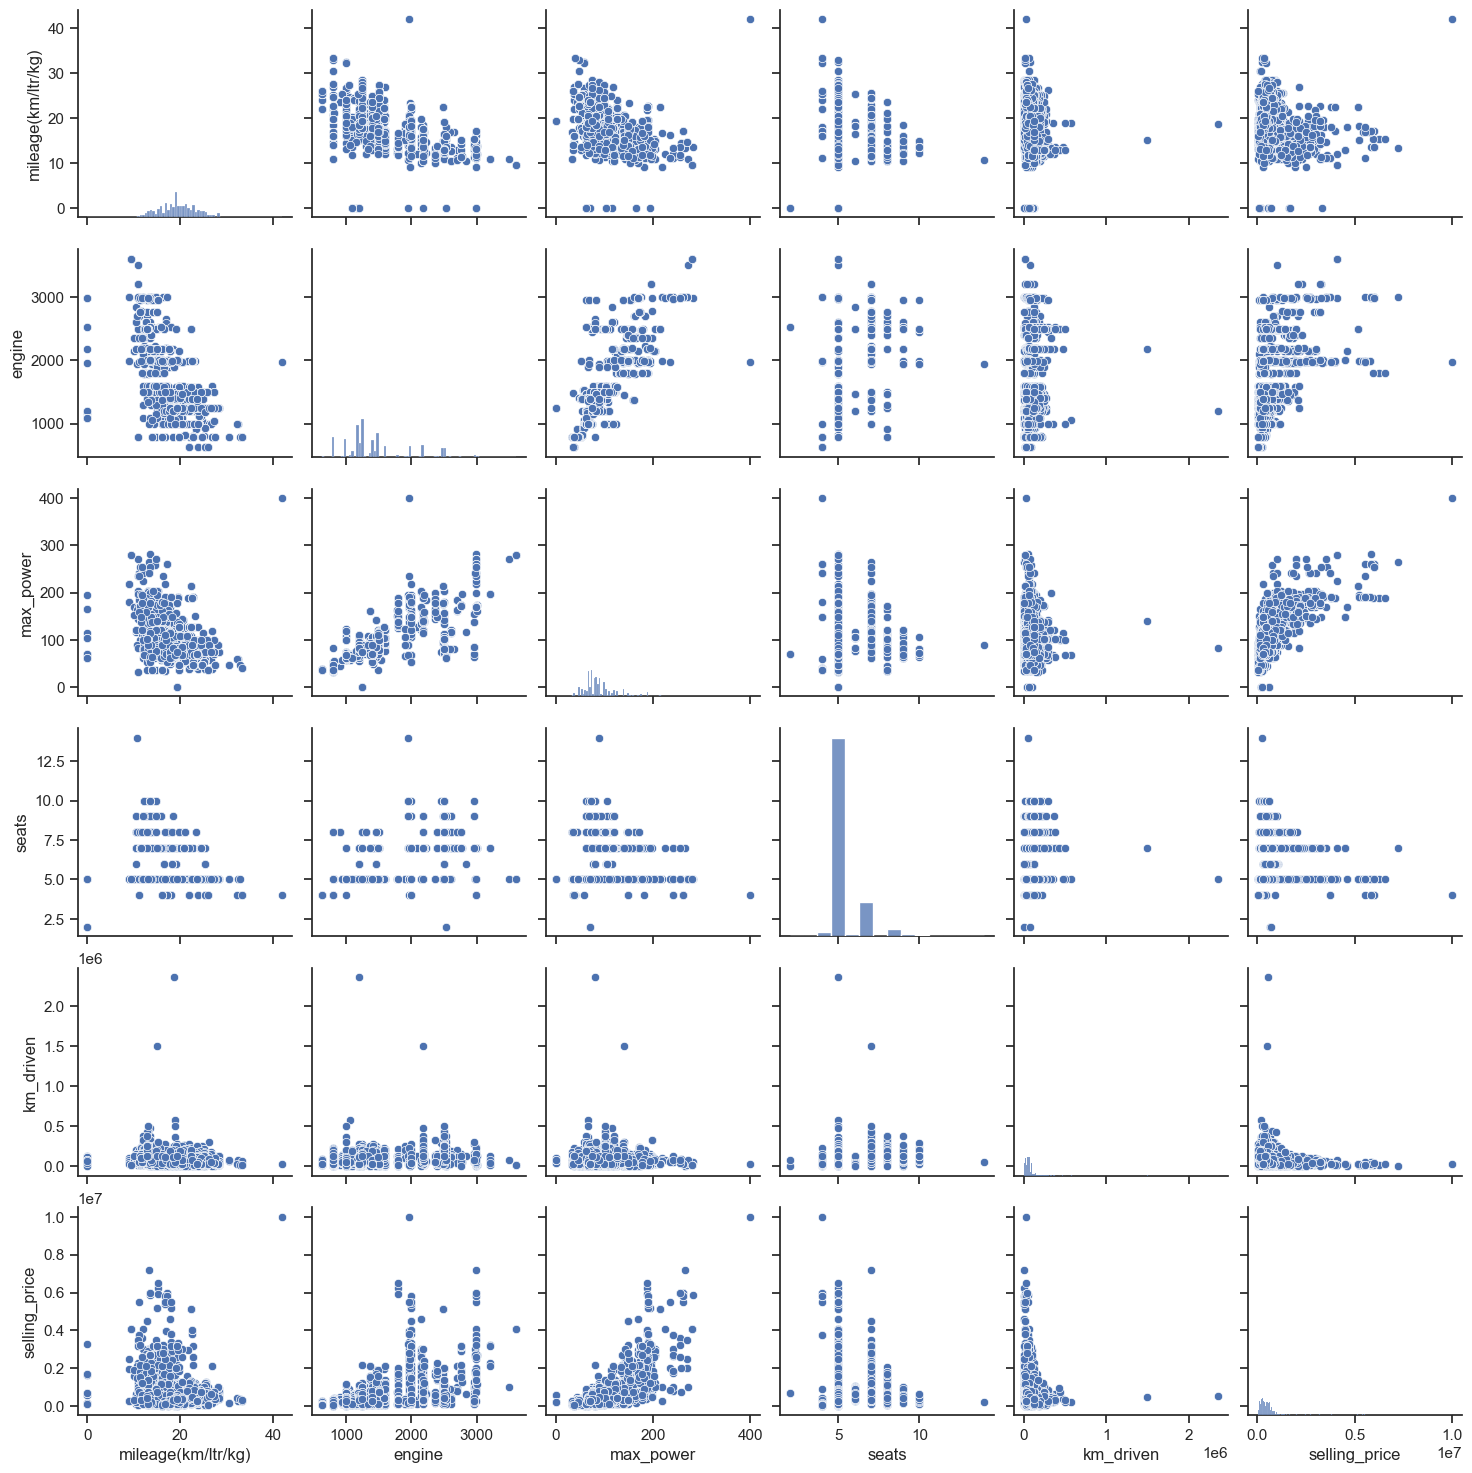

In [21]:
numericals = ["mileage(km/ltr/kg)", "engine", "max_power", "seats", "km_driven", "selling_price"]
sns.pairplot(data, vars=numericals)
plt.show()

### Средняя цена продажи в год

In [31]:
def plot(df, name, nums, axes):
    group = df.groupby(name)
    mean = group[nums].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes)
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

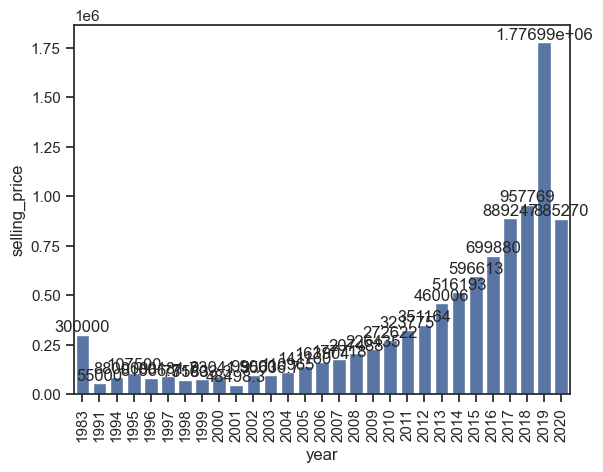

In [42]:
fig, axes = plt.subplots()
plot(data, "year", "selling_price", axes)
plt.show()

### Средние значения по каждой категории

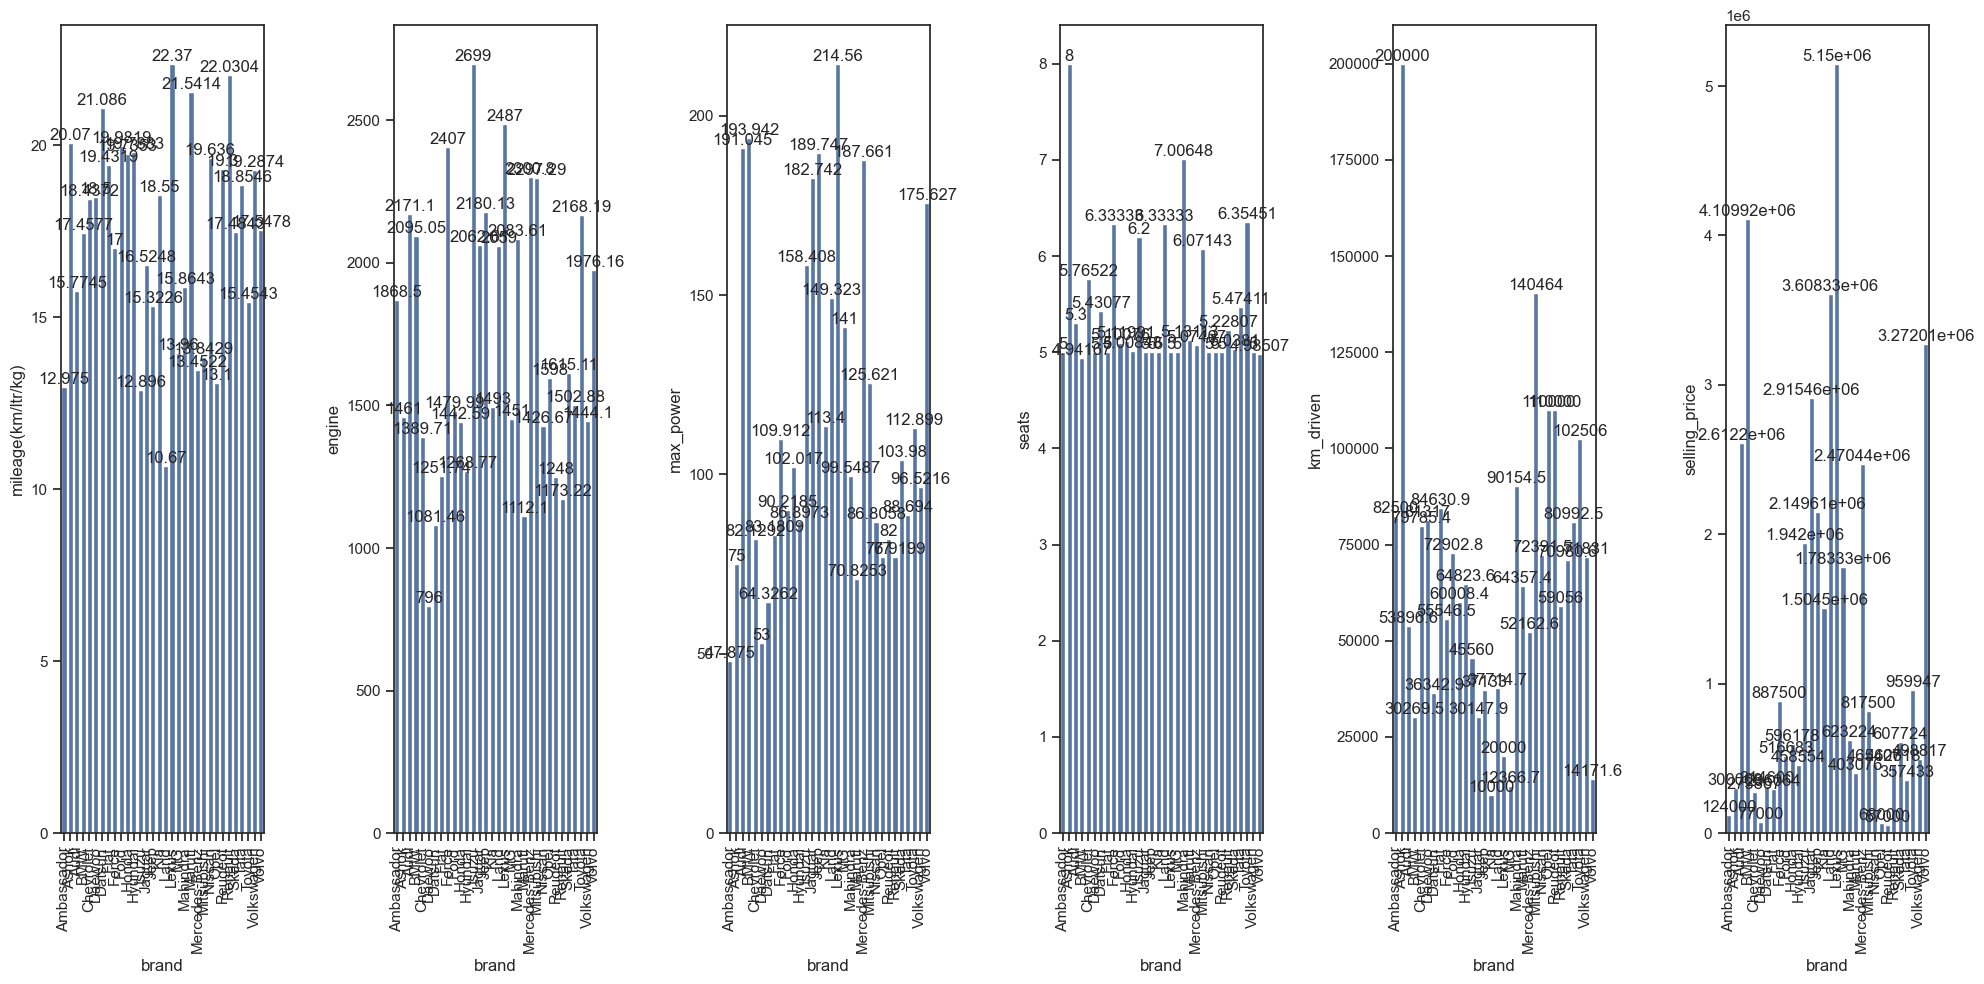

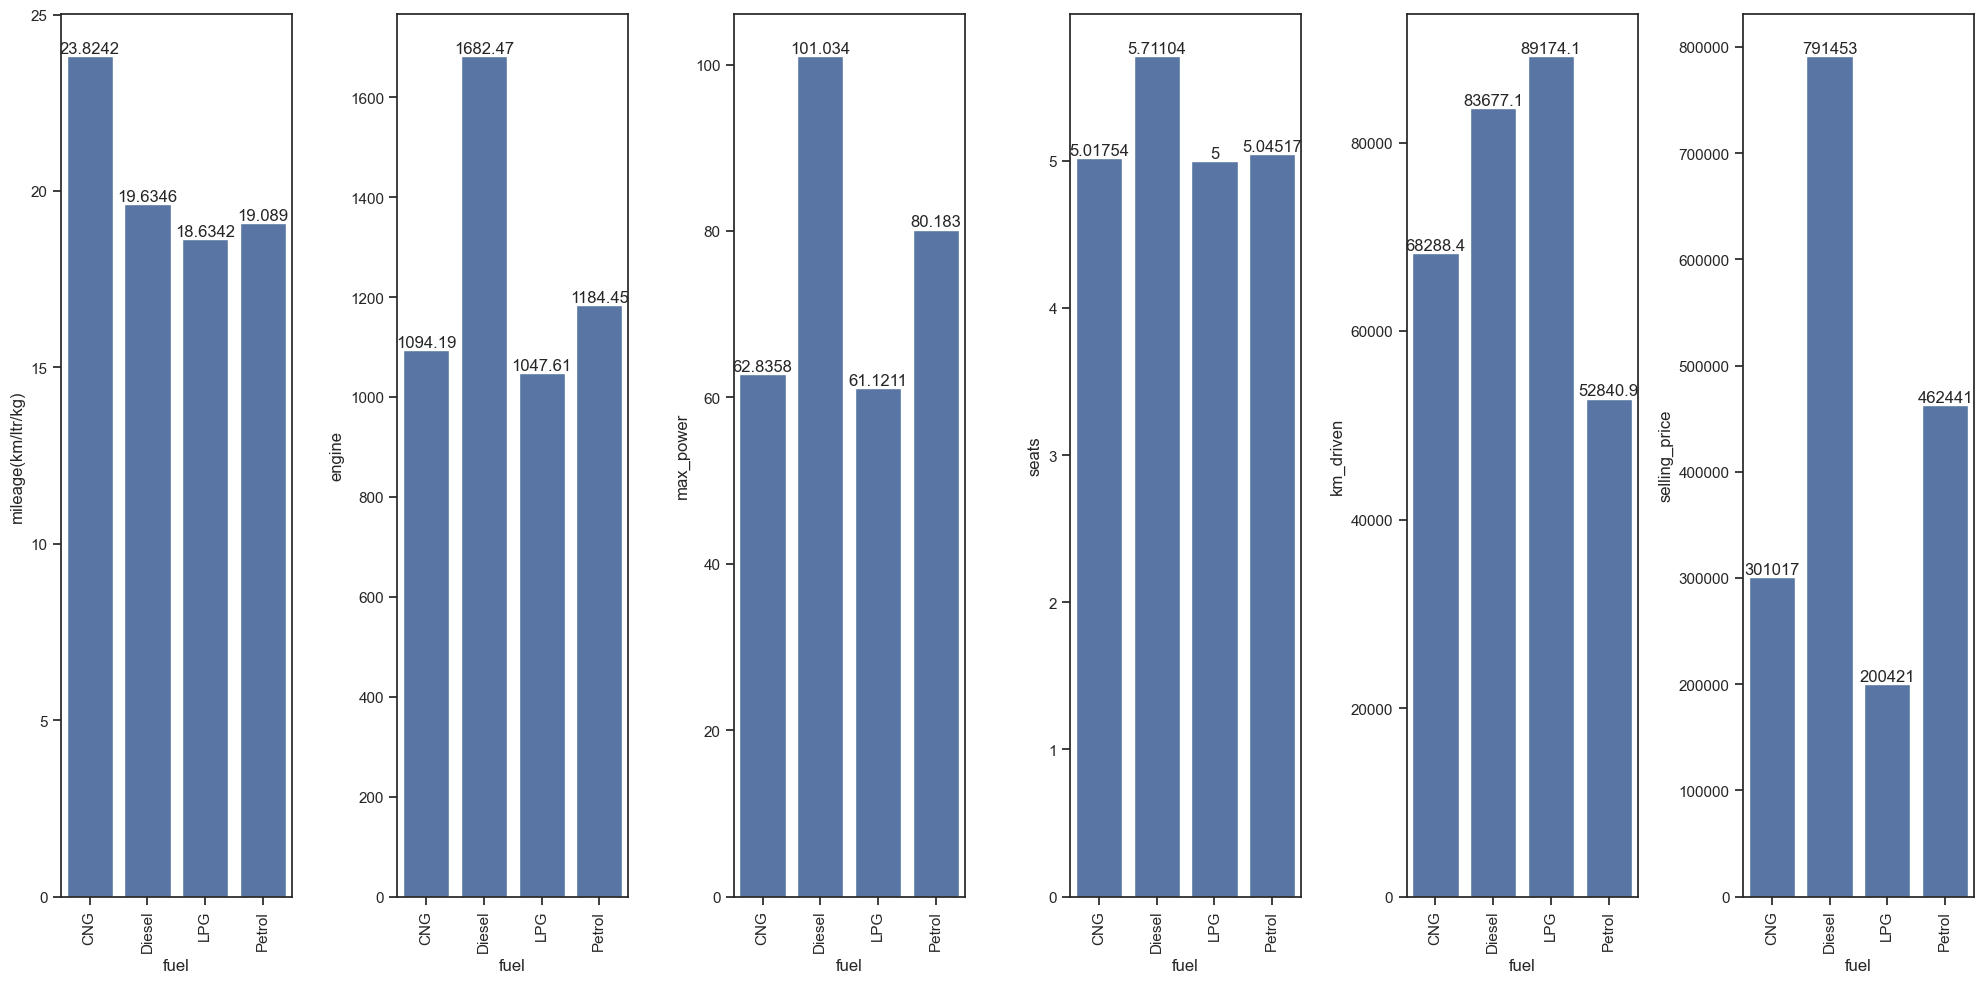

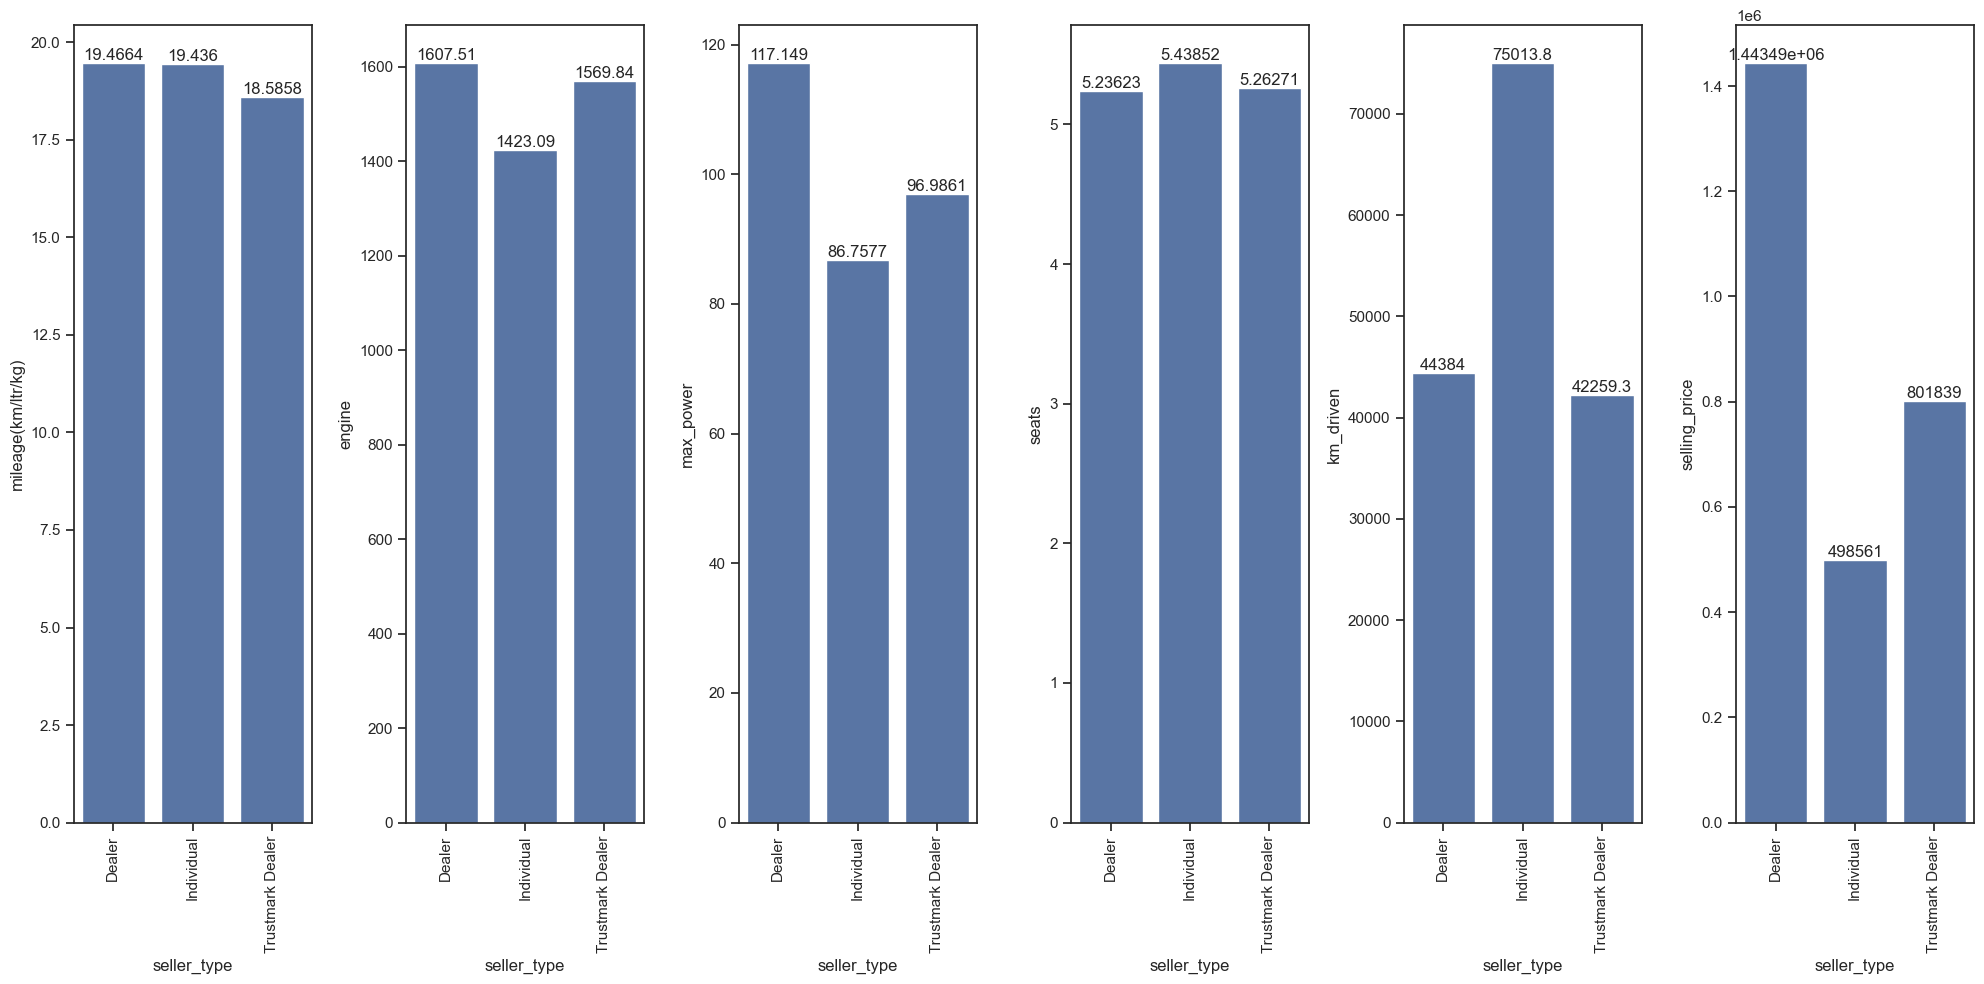

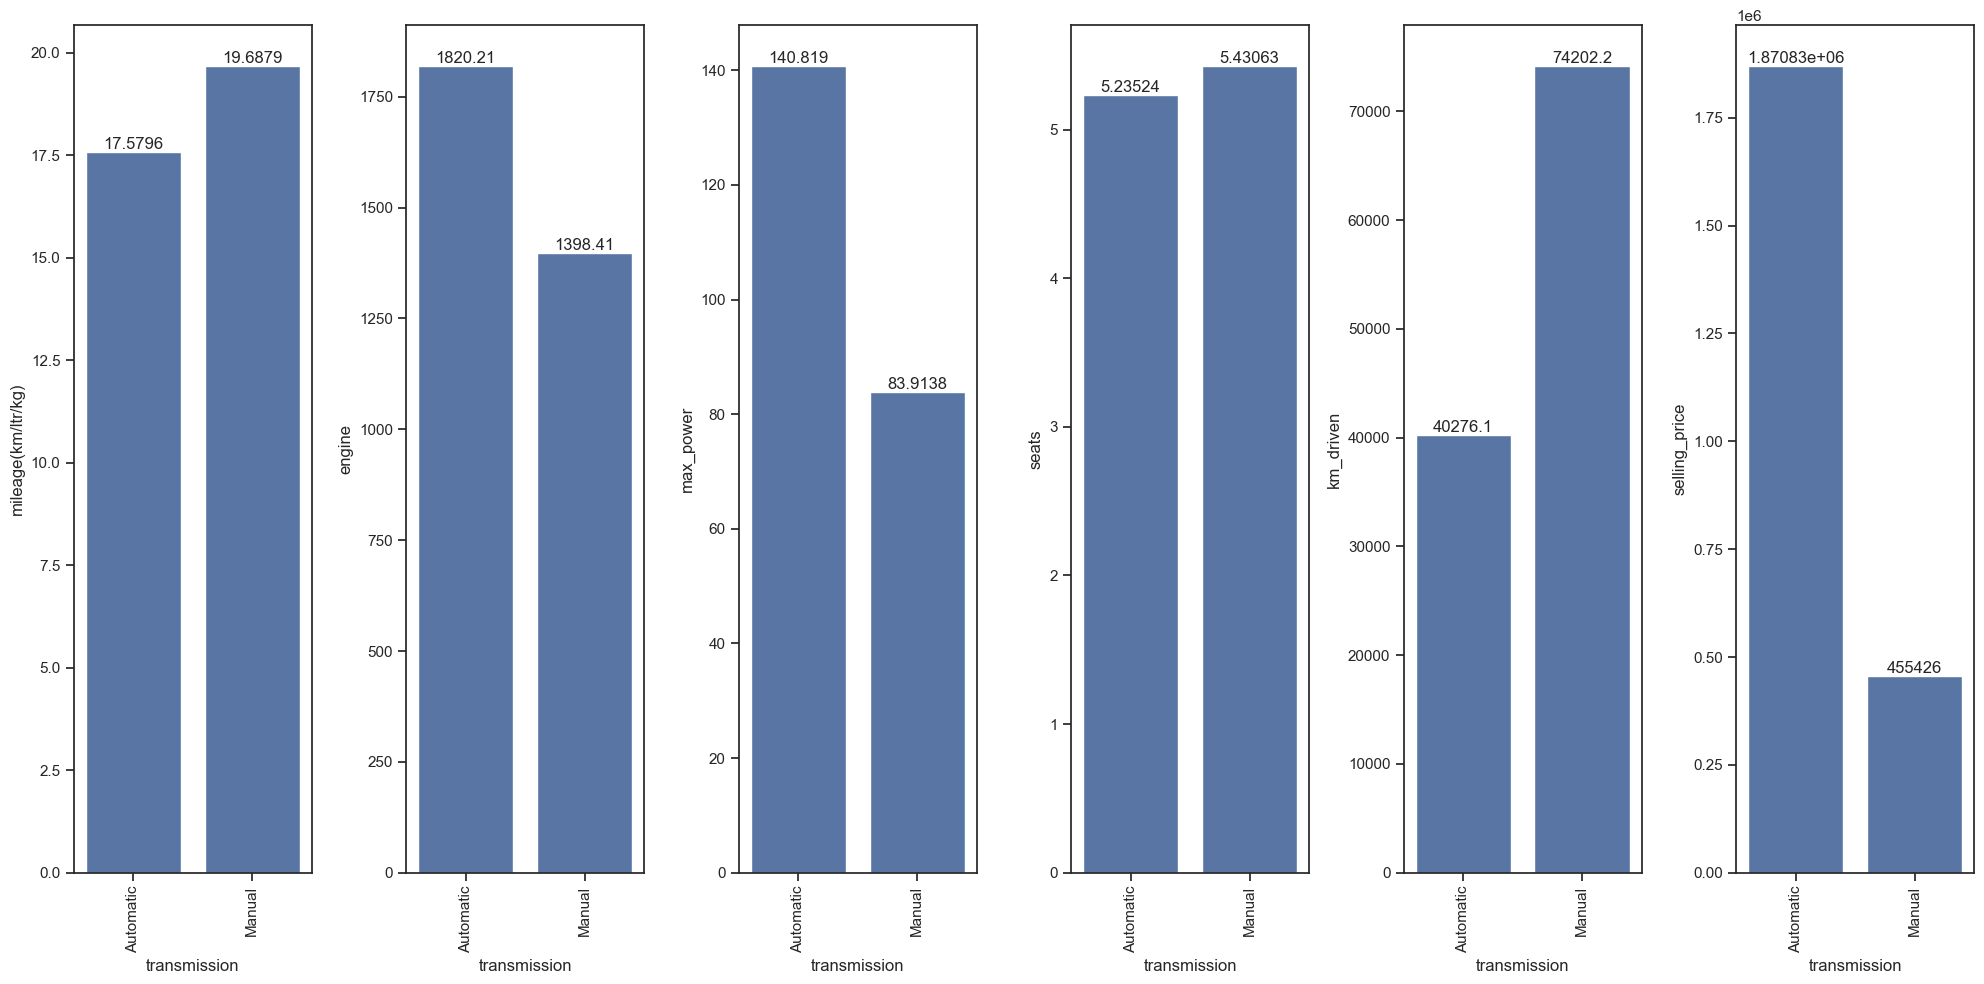

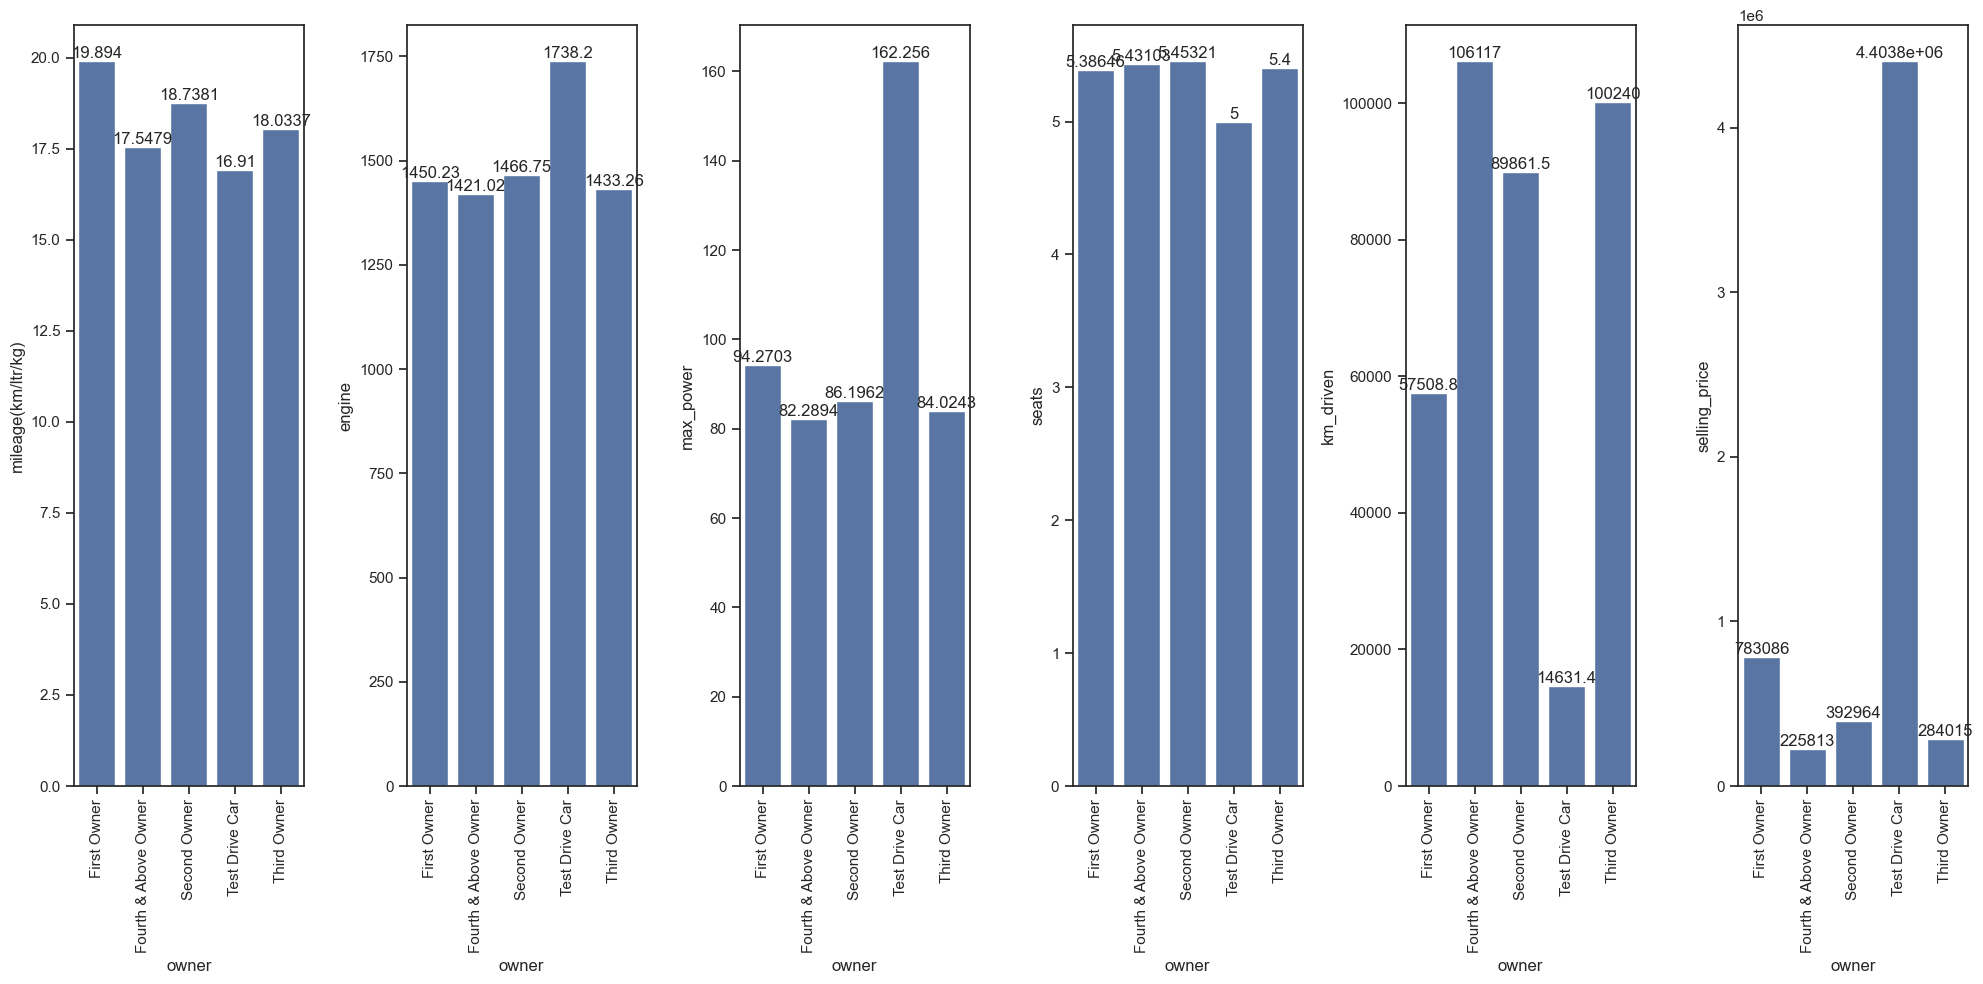

In [45]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
    for j, k in enumerate(numericals):
        plot(data, i, k, axes[j])
    plt.tight_layout()
    plt.show()

### Распределение плотности данных для каждого класса

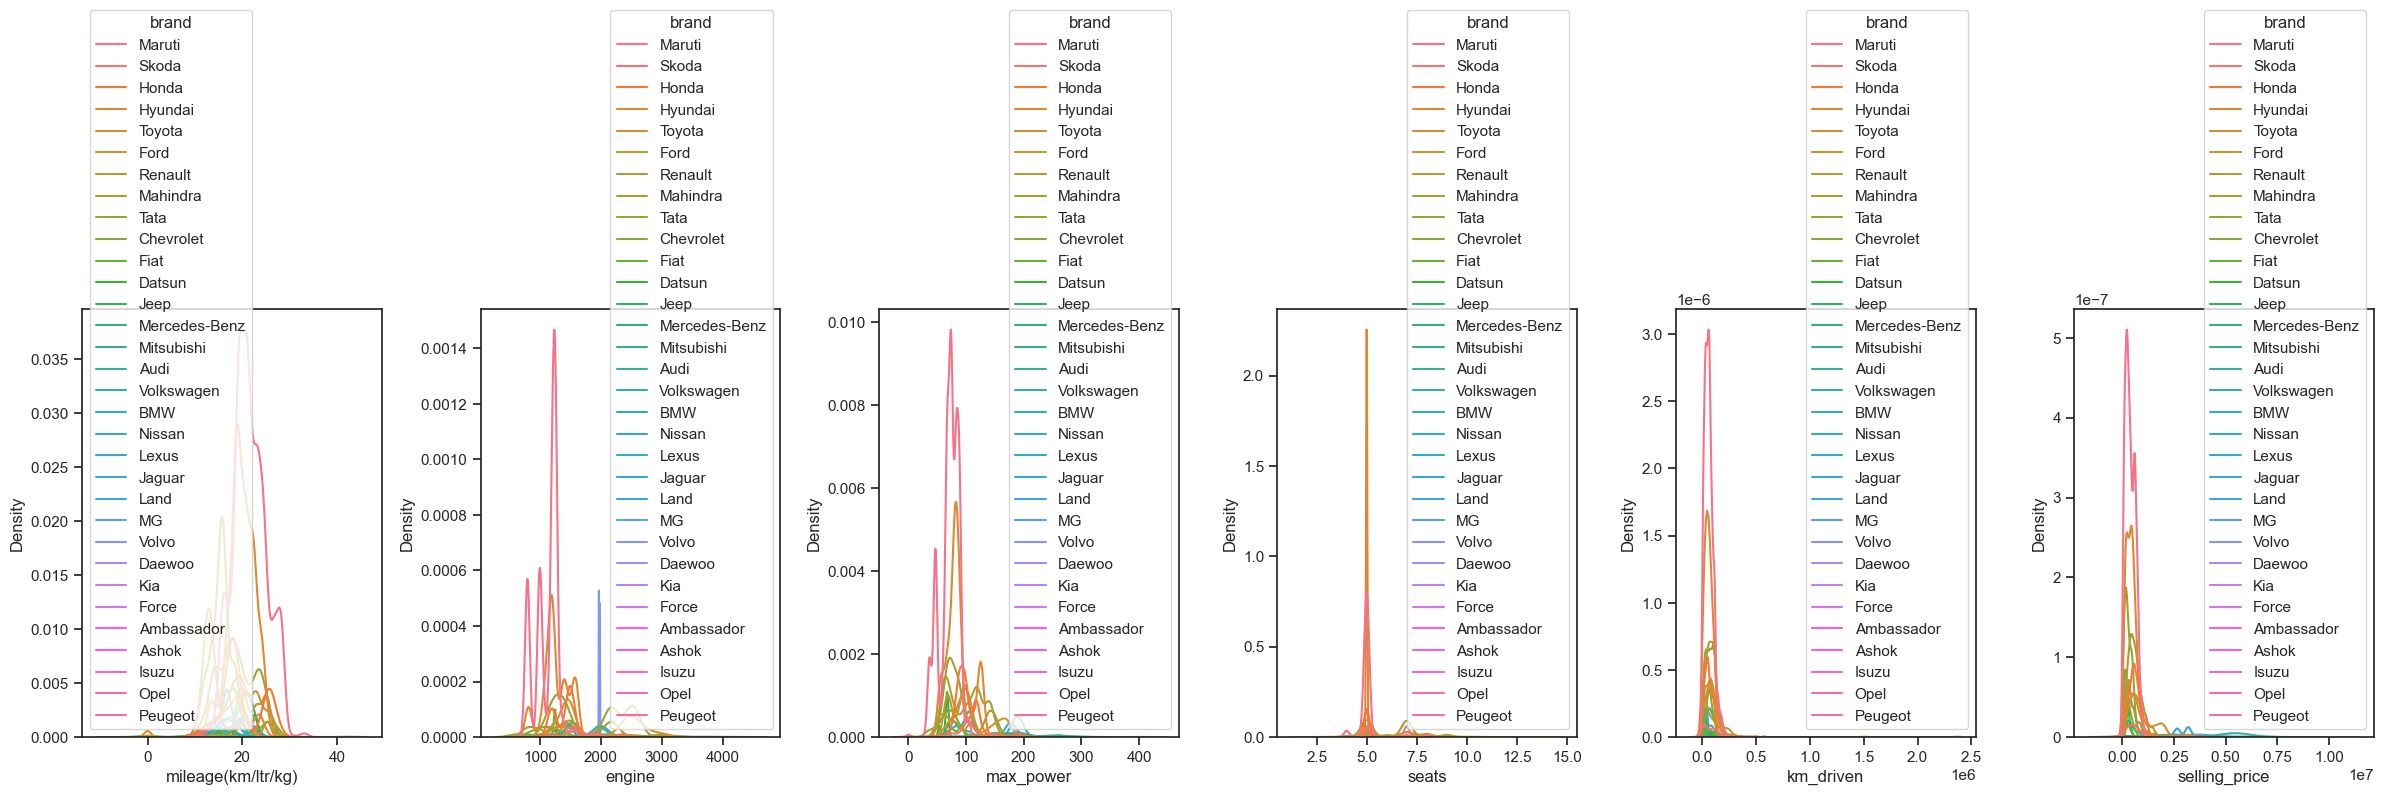

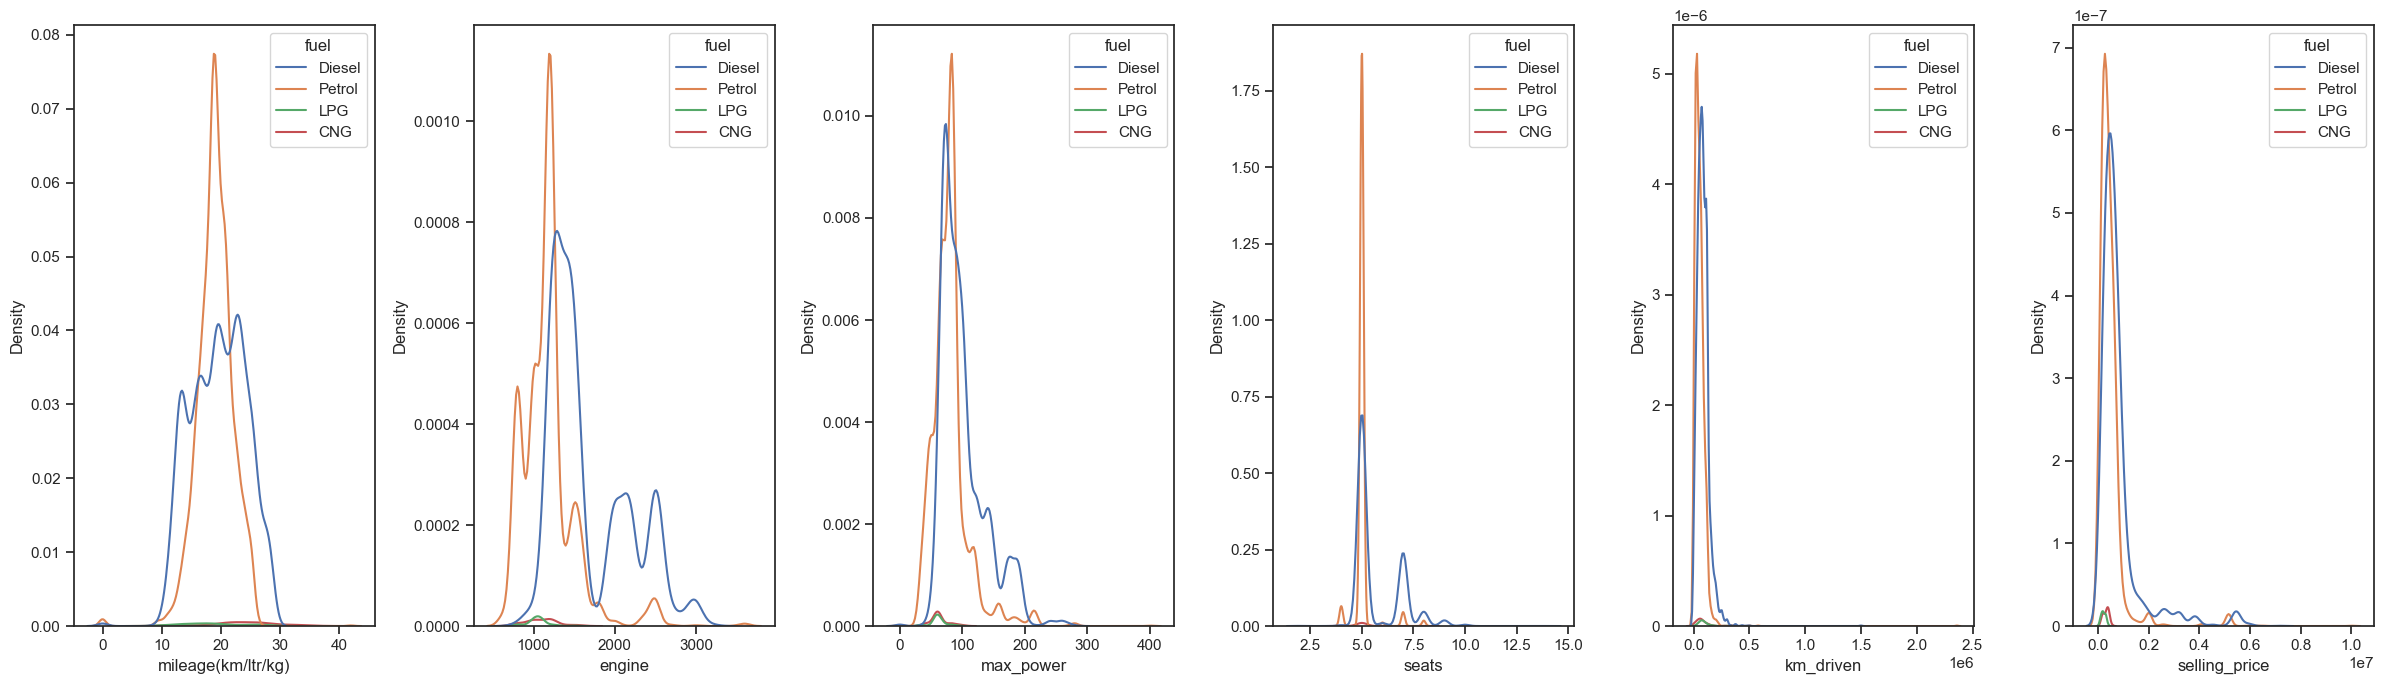

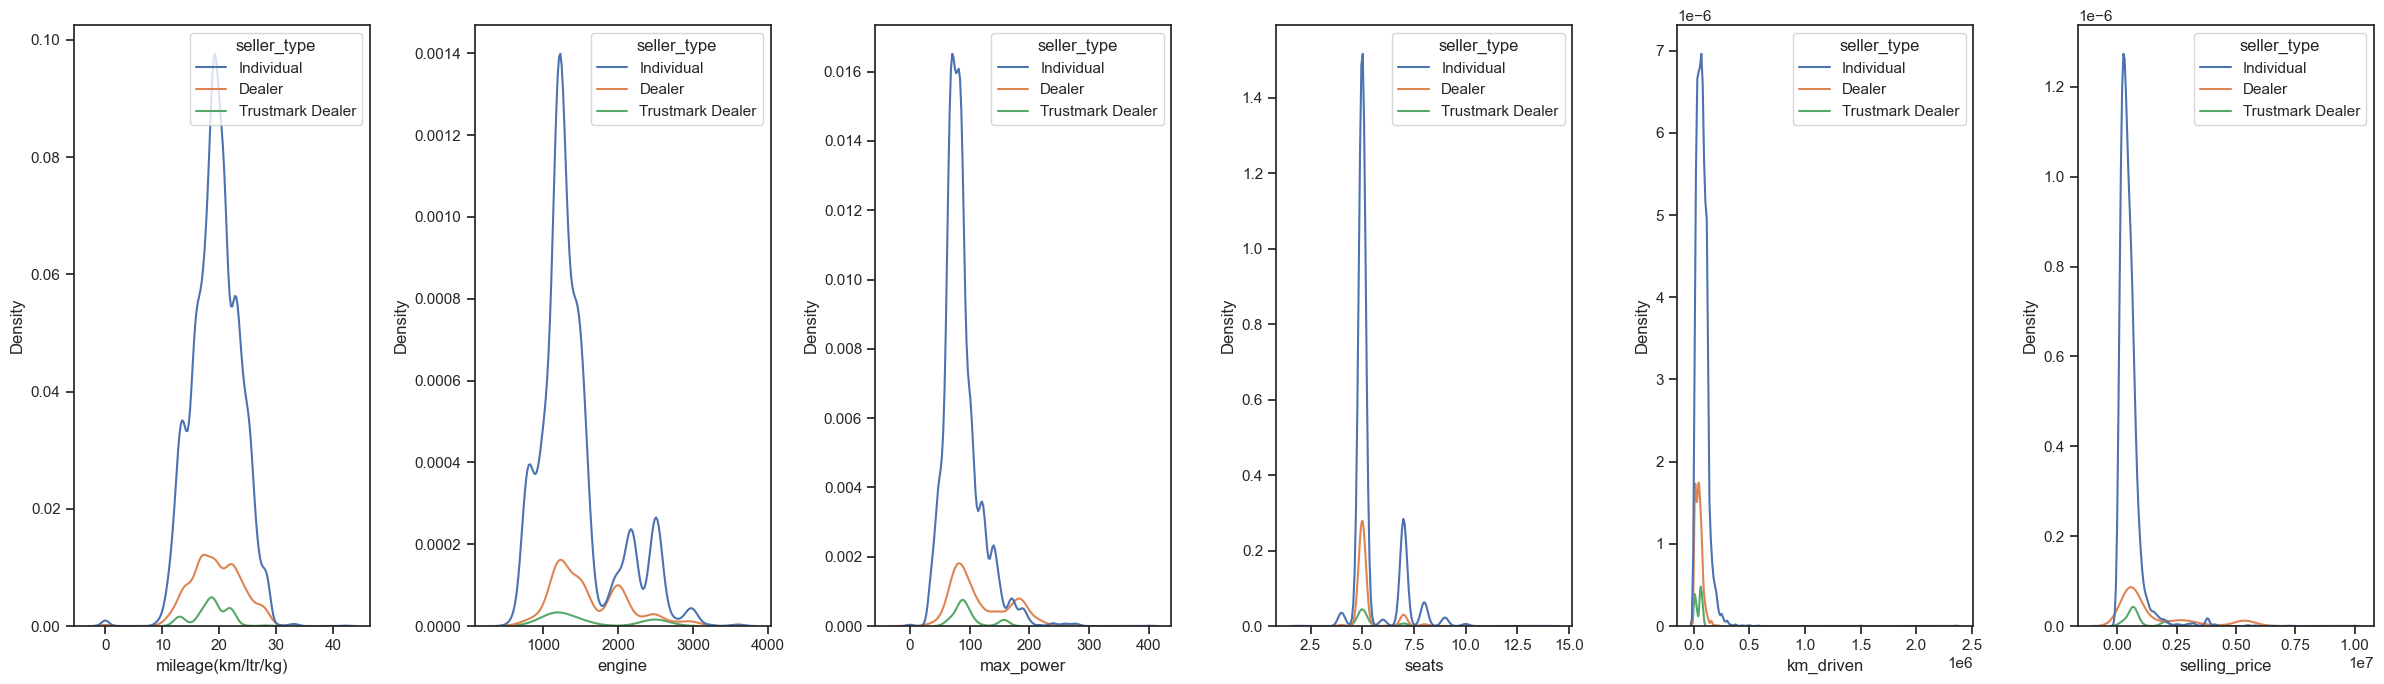

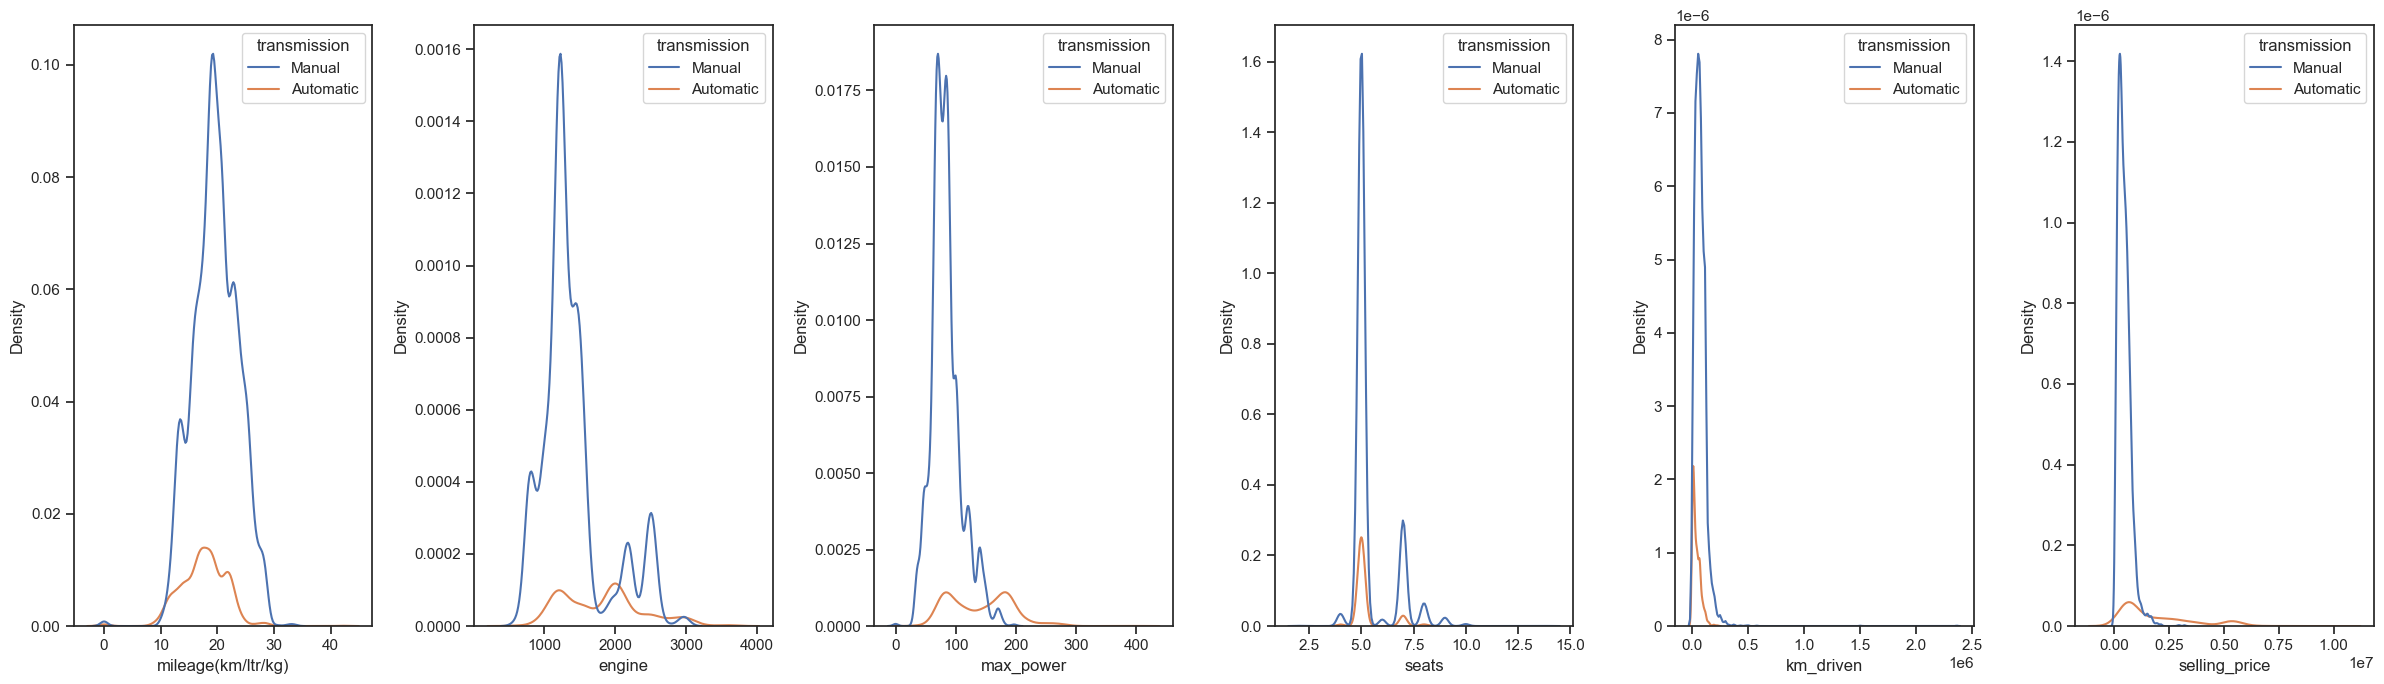

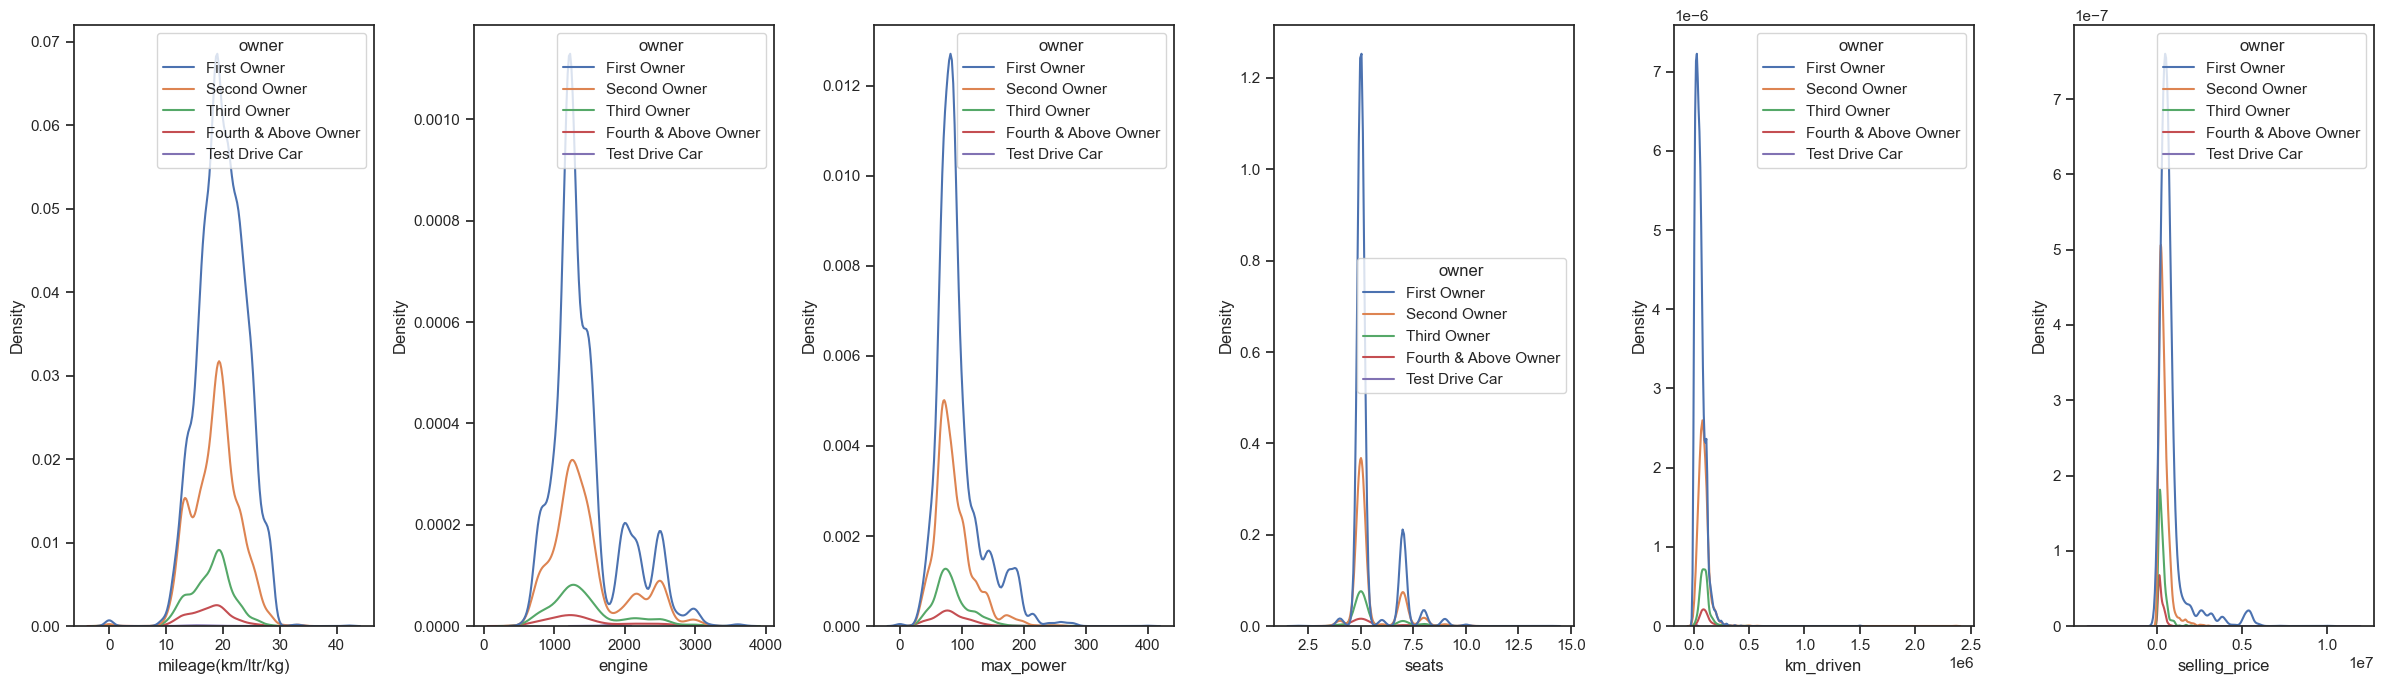

In [46]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 7))
    for j, k in enumerate(numericals):
        sns.kdeplot(data, x=k, hue=i, ax=axes[j])
    plt.tight_layout()
    plt.show()

### Распределение вероятности для каждой категории

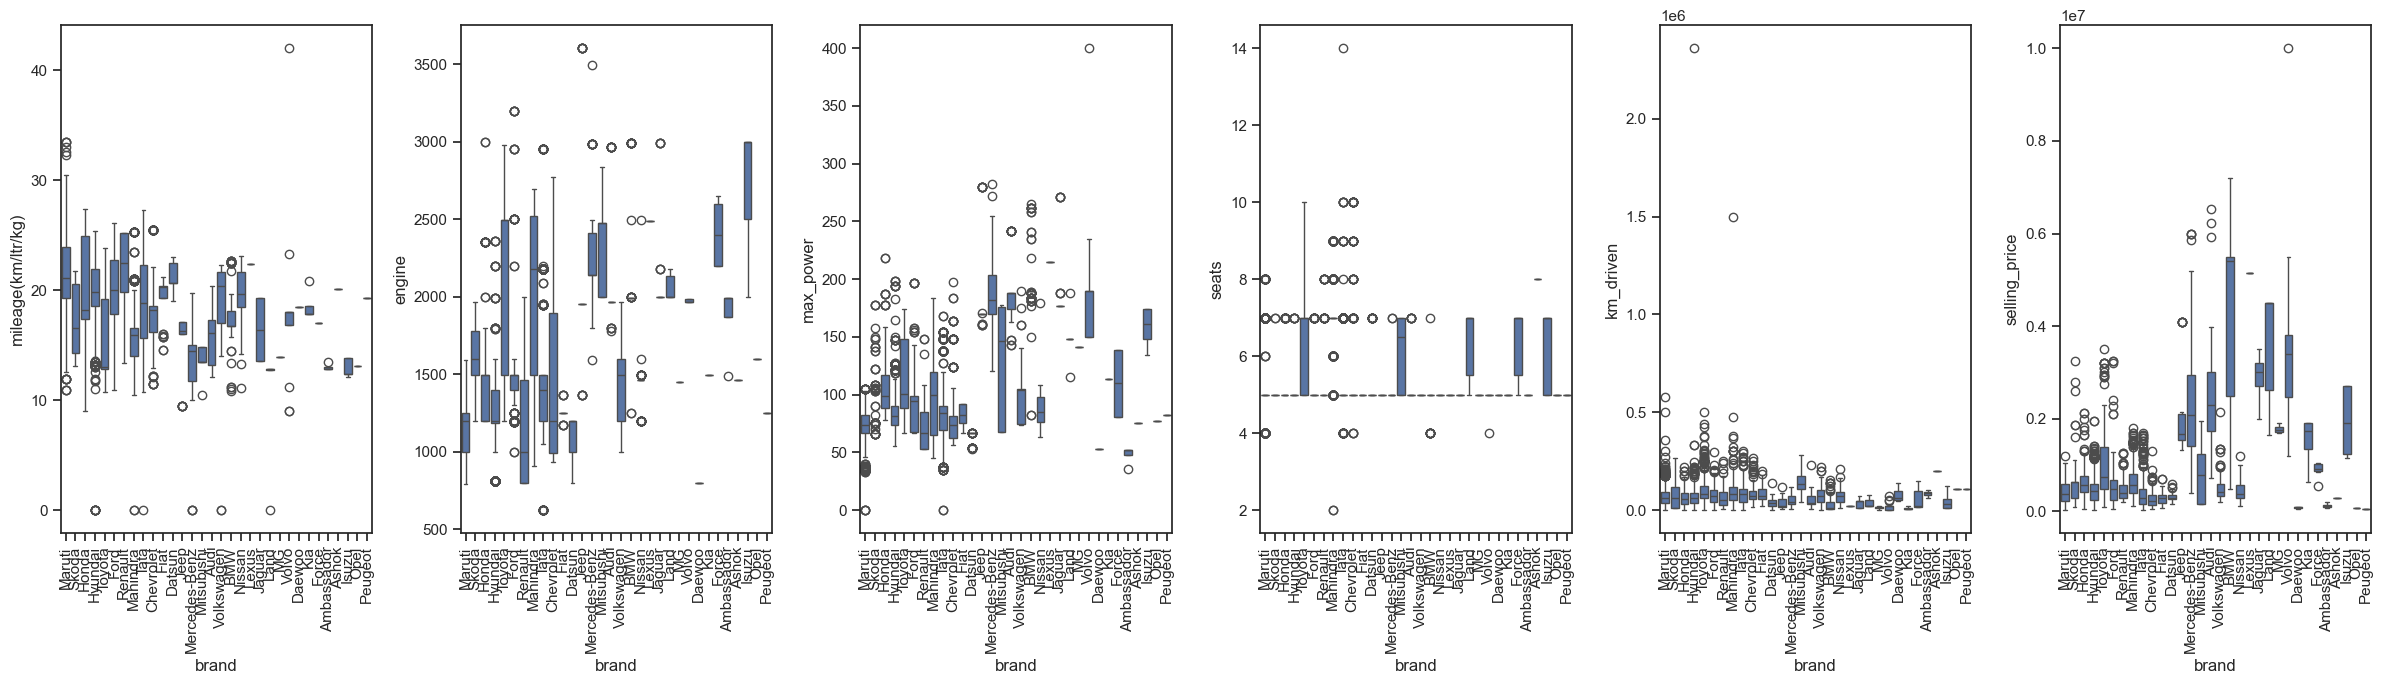

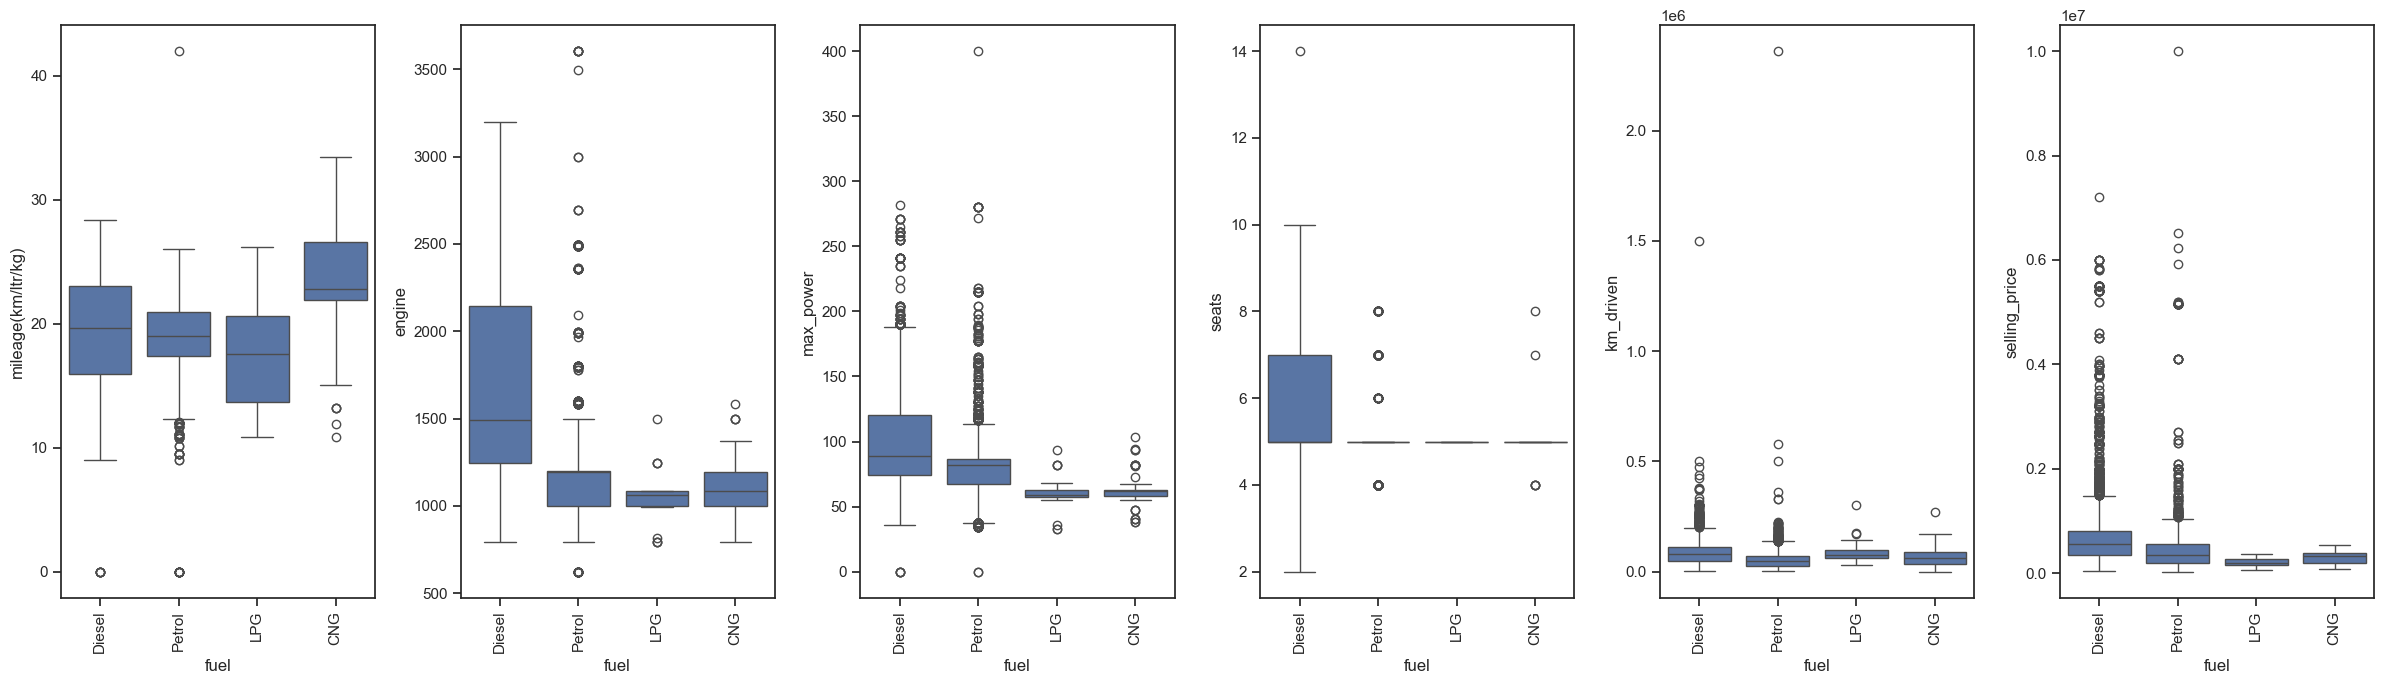

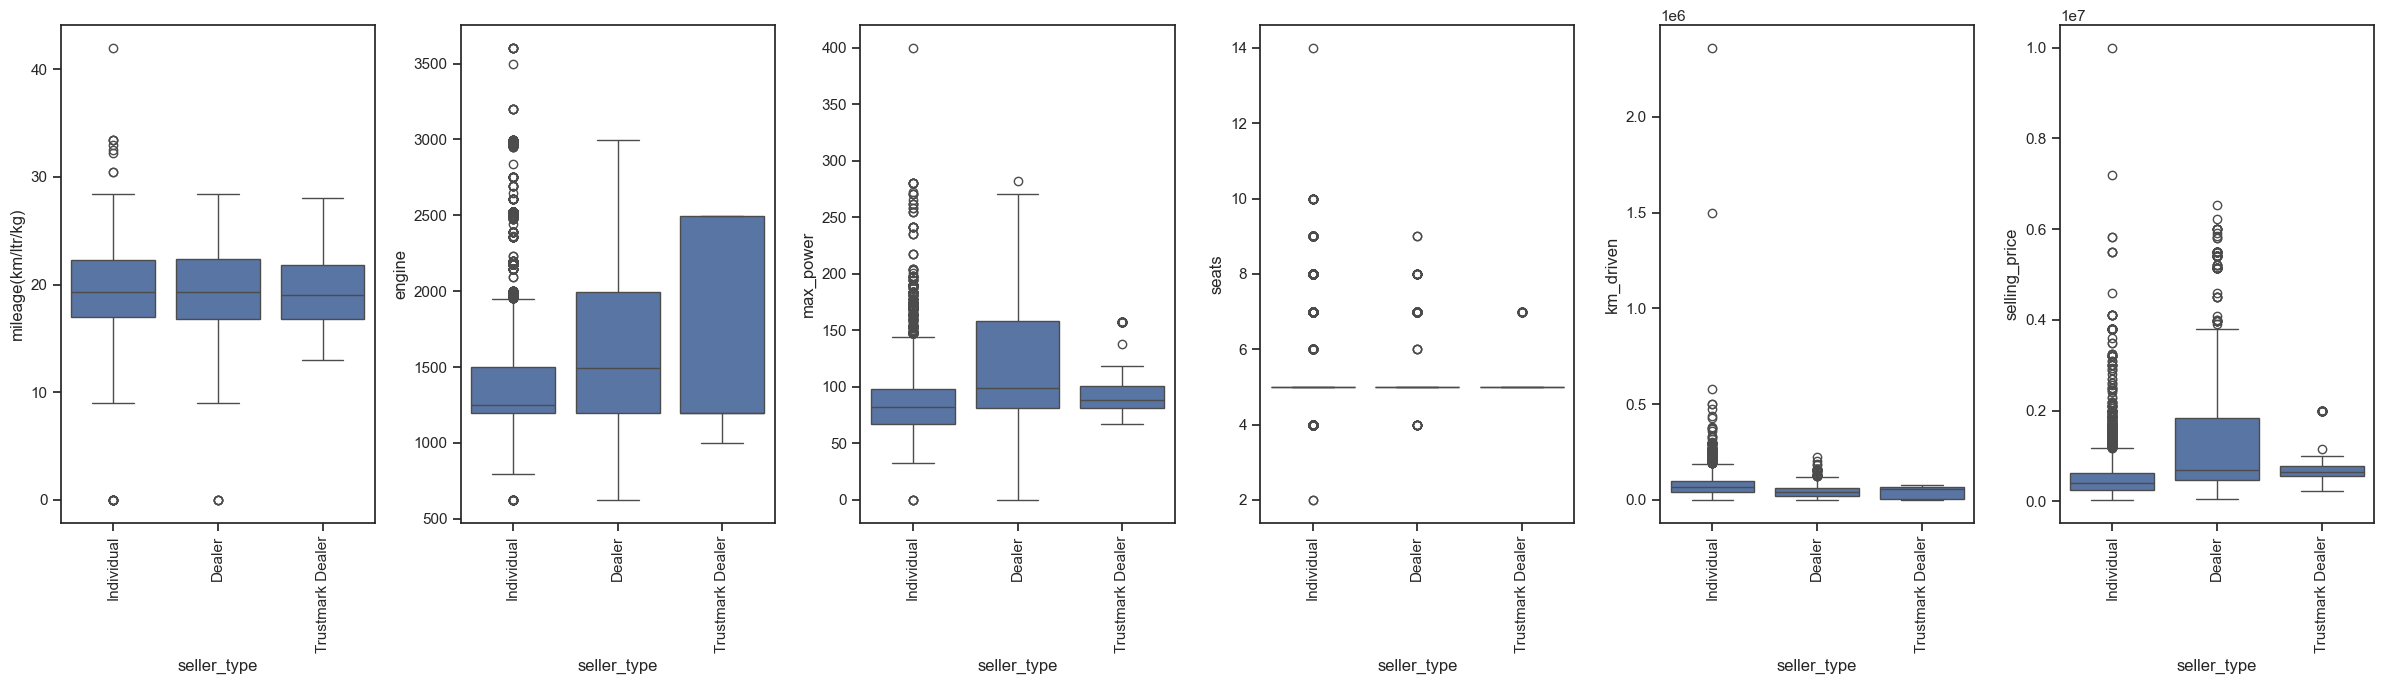

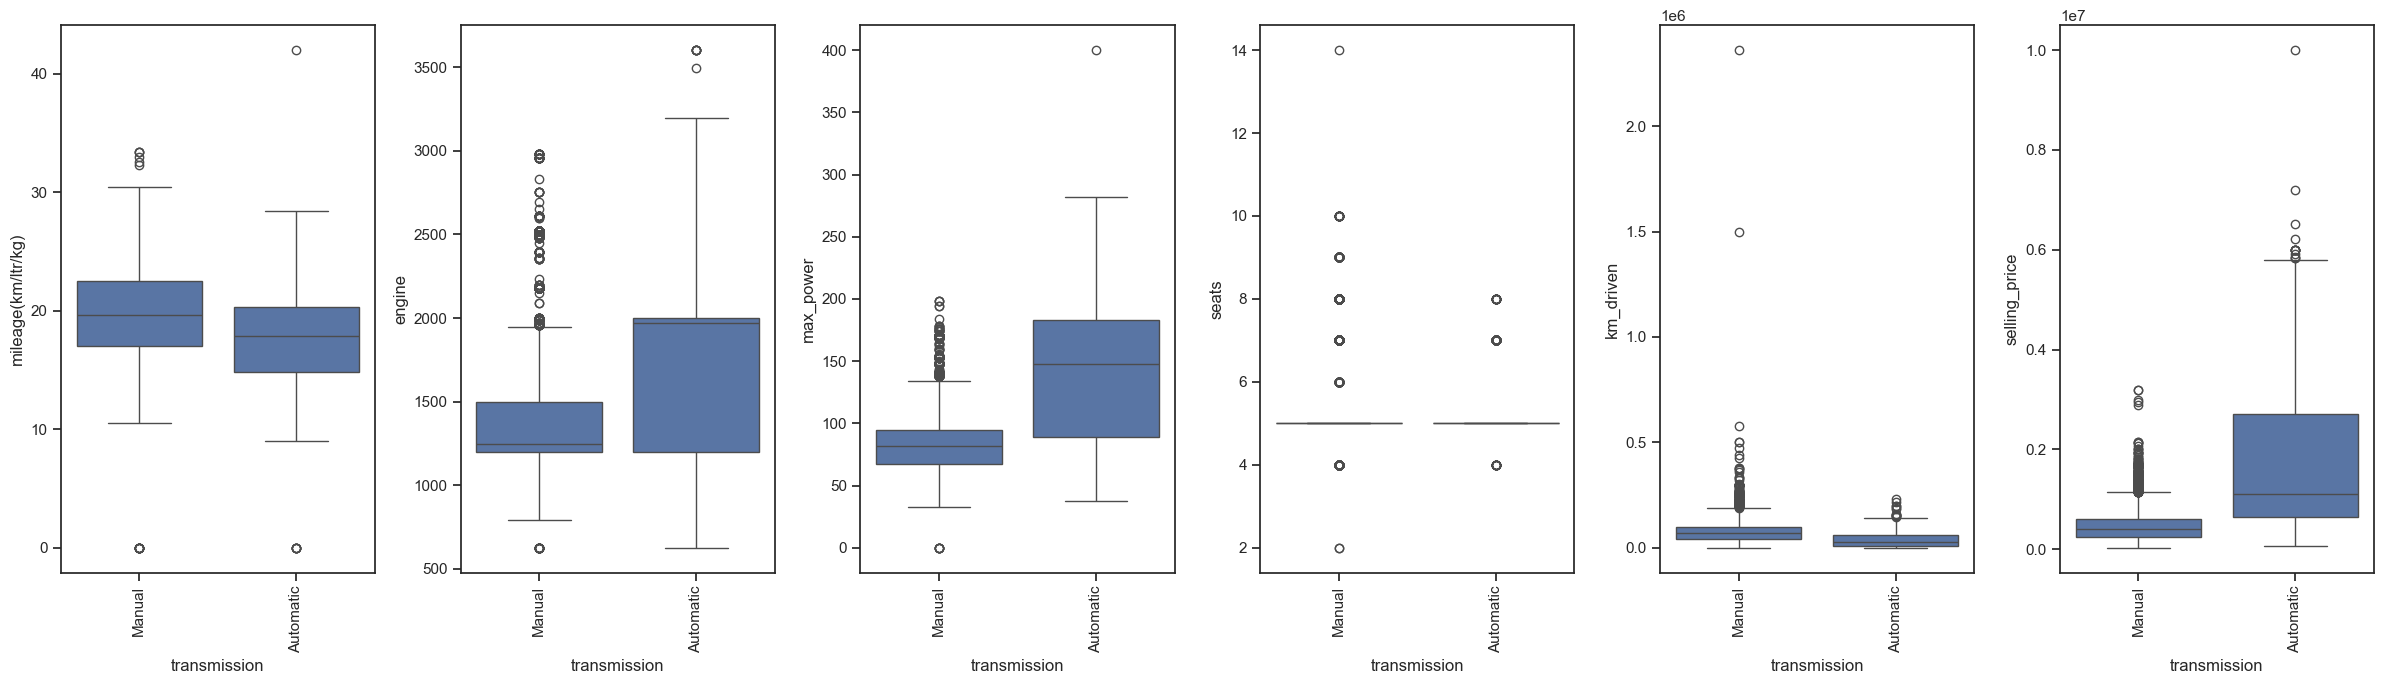

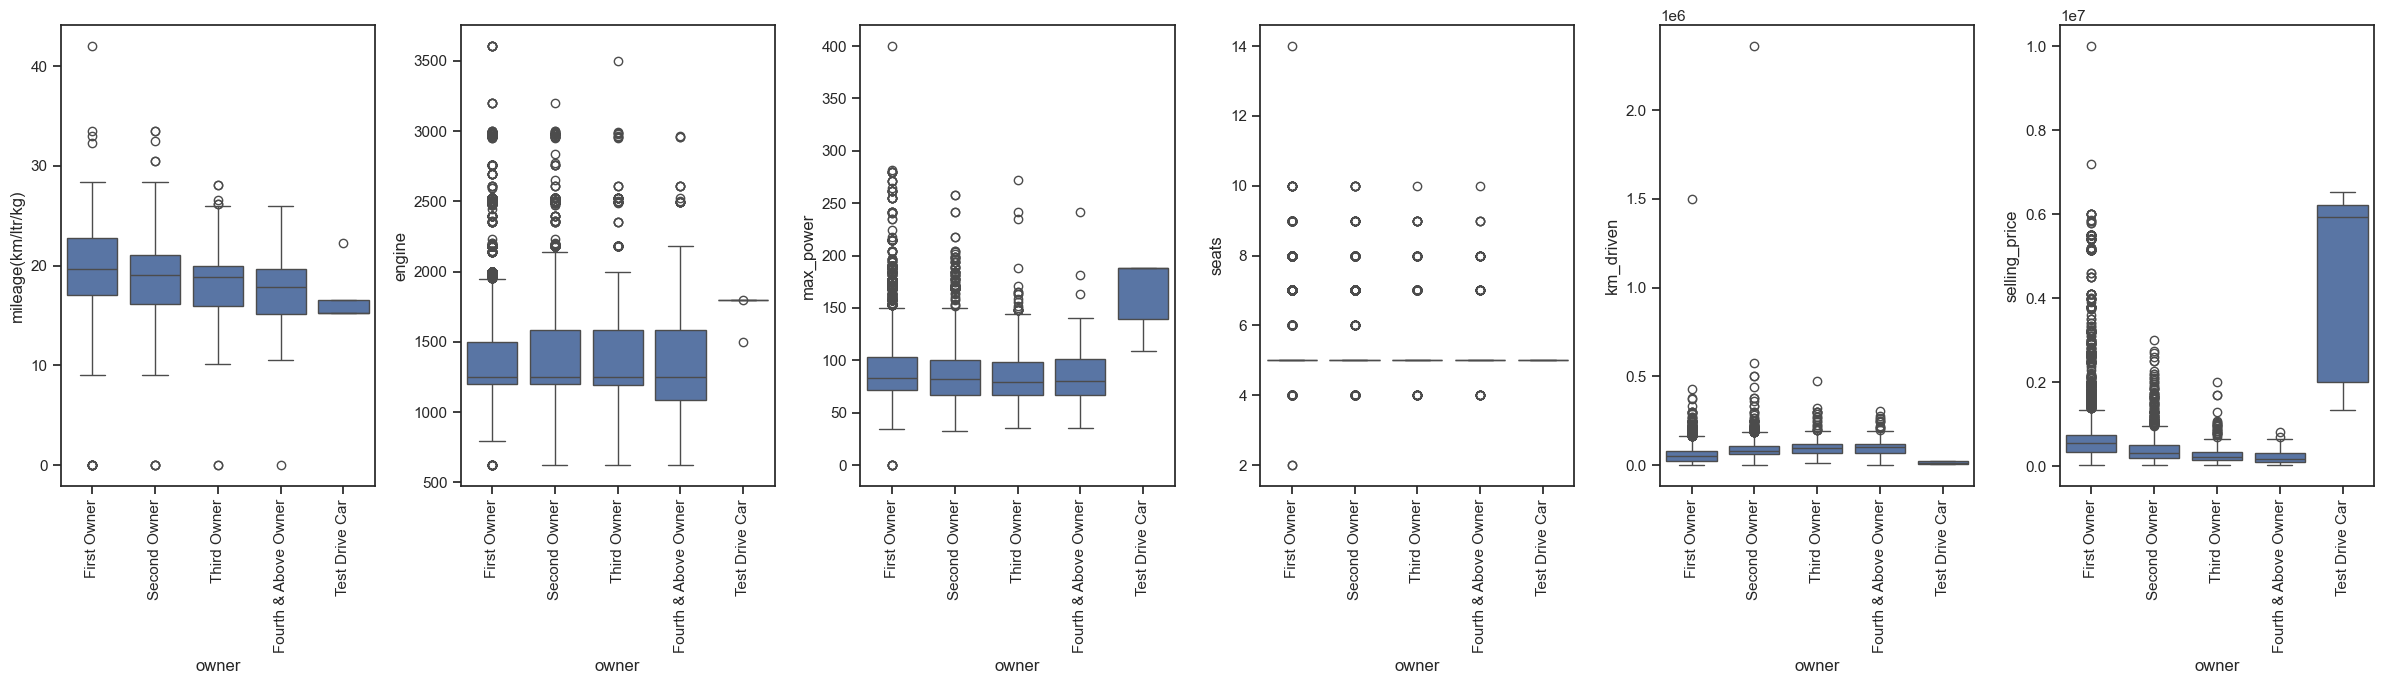

In [47]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 7))
    for j, k in enumerate(numericals):
        sns.boxplot(data, y=k, x=i, ax=axes[j])
        axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

## 4) Информация о корреляции признаков
На основе корреляционной матрицы можно сделать следующие выводы:

Целевой признак(selling_price-цена продажи) наиболее сильно коррелирует с максимальной скоростью (0.75). Этот признак обязательно следует оставить в модели.
Целевой признак отчасти коррелирует с мощностью (0.46). Этот признак стоит также оставить в модели.
Целевой признак слабо коррелирует с количеством сидячих мест (0.047). Скорее всего этот признак стоит исключить из модели, возможно он только ухудшит качество модели.
Мощность и максимальная скорость очень сильно коррелируют между собой (0.7). Поэтому из этих признаков в модели можно оставлять только один.
Также можно сделать вывод, что выбирая из признаков мощность и максимальная скорость, лучше выбрать максимальную скорость, потому что он сильнее коррелирован с целевым признаком.

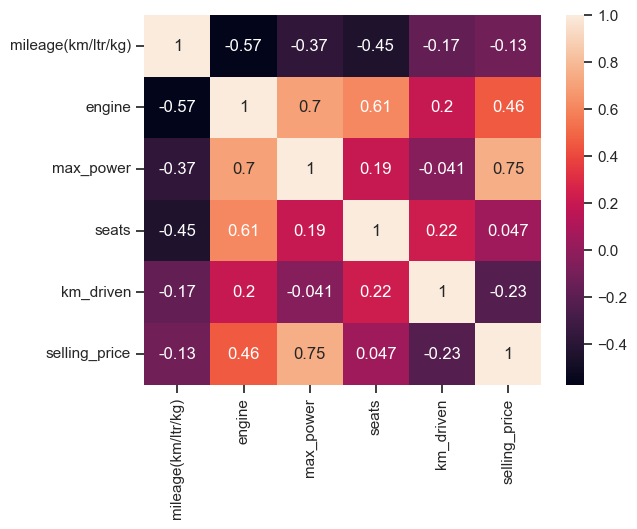

In [48]:
corr = data[numericals].corr()
sns.heatmap(corr, annot=True)
plt.show()